# 1. Retrieving and Preparing the Heart Failure Data-set

## 1.1 Data Retrieving and Checking 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import graphviz

In [2]:
heartFailureOriginal=pd.read_csv("heart_failure_clinical_records_dataset.csv")
heartFailureOriginal.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
heartFailureOriginal.shape

(299, 13)

In [4]:
heartFailureOriginal.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## 1.2 Data Description:

- `age` age of the patient (years), datatype-numeric
- `anaemia` decrease of red blood cells or hemoglobin (boolean)
- `high_blood_pressure` if the patient has hypertension (boolean)
- `creatinine_phosphokinase (CPK)` level of the CPK enzyme in the blood (mcg/L), datatype-numeric
- `diabetes` if the patient has diabetes (boolean)
- `ejection fraction` percentage of blood leaving the heart at each contraction (percentage), datatype-numeric
- `platelets` platelets in the blood (kiloplatelets/mL), datatype-numeric
- `sex` woman (0) or man (1) (catagorical)
- `serum creatinine` level of serum creatinine in the blood (mg/dL), datatype-numeric
- `serum sodium` level of serum sodium in the blood (mEq/L), datatype-numeric
- `smoking` if the patient smokes or not (boolean)
- `time` follow-up period (days), datatype-numeric
- `[target] death event` if the patient deceased during the follow-up period (boolean)

## 1.3 Data Preparation

In [5]:
heartFailureOriginal.dtypes
heartFailure = heartFailureOriginal.copy()

In [6]:
heartFailure['anaemia'] = heartFailure['anaemia'].astype('bool')
heartFailure['diabetes'] = heartFailure['diabetes'].astype('bool')
heartFailure['high_blood_pressure'] = heartFailure['high_blood_pressure'].astype('bool')
heartFailure['sex'] = heartFailure['sex'].astype('category')
heartFailure['smoking'] = heartFailure['smoking'].astype('bool')
heartFailure['DEATH_EVENT'] = heartFailure['DEATH_EVENT'].astype('bool')

In [7]:
heartFailureOriginal.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [8]:
heartFailure.dtypes

age                          float64
anaemia                         bool
creatinine_phosphokinase       int64
diabetes                        bool
ejection_fraction              int64
high_blood_pressure             bool
platelets                    float64
serum_creatinine             float64
serum_sodium                   int64
sex                         category
smoking                         bool
time                           int64
DEATH_EVENT                     bool
dtype: object

Searching null values

In [9]:
heartFailure.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Descriptive statistics of Numerical Columns

In [10]:
heartFailure.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


Use a series of box charts to check all the numerical data, see if there is any outliers. 

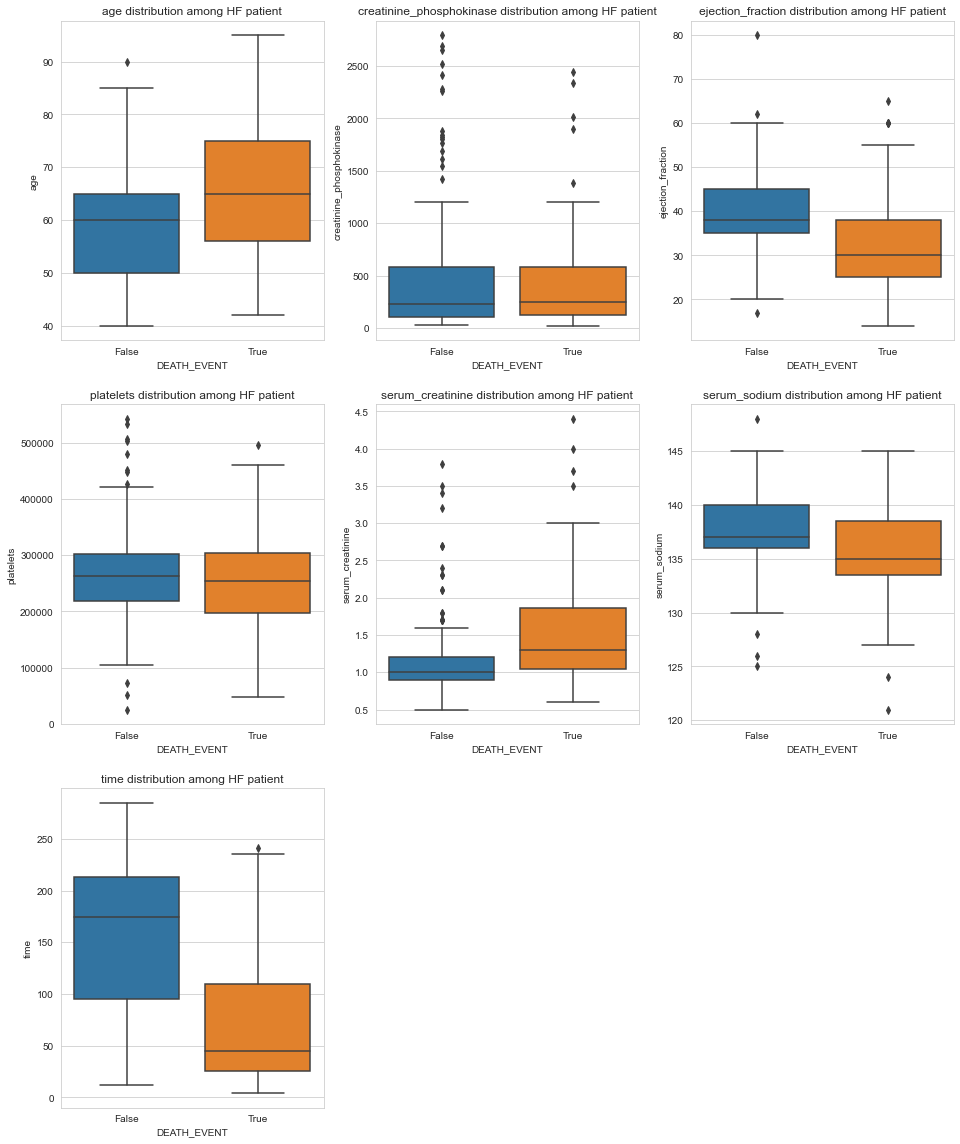

In [83]:
plt.figure(figsize=(16,20))
plt.subplots_adjust()
i = 1

for col in heartFailure.columns:
    if (heartFailure[col].dtypes == np.float64 or heartFailure[col].dtypes == np.int64) and col !='DEATH_EVENT':
            plt.subplot(3,3,i)
            sns.boxplot(x='DEATH_EVENT',y=col,data=heartFailure)
            i = i+1
            plt.title(col+' distribution among HF patient') 

plt.show()

From the box plots above we can see several columns have some extreme outliers, for example the creatinine_phosphokinase, platelets, serum_creratinine and serum_sodium. Therefore we remove some extreme outliers as shown below. Noted that we did not remove all outliers: as sick patient can sometimes have very high/low level of medical data. There is no guideline on what level is too high/low, therefore we only remove the very extreme data. 

In [12]:
print("Number of rows with creatinine_phosphokinase > 3000: ", np.sum(heartFailure['creatinine_phosphokinase']>3000))
print("Number of rows with platelets > 600000: ", np.sum(heartFailure['platelets']>600000))
print("Number of rows with serum_creatinine > 5: ", np.sum(heartFailure['serum_creatinine']>5))
print("Number of rows with serum_sodium < 120: ", np.sum(heartFailure['serum_sodium']<120))

Number of rows with creatinine_phosphokinase > 3000:  7
Number of rows with platelets > 600000:  3
Number of rows with serum_creatinine > 5:  5
Number of rows with serum_sodium < 120:  2


removing outliers

In [13]:
heartFailure = heartFailure.loc[(heartFailure['creatinine_phosphokinase']<3000) & (heartFailure['platelets']<600000) &
                                    (heartFailure['serum_creatinine']<5) & (heartFailure['serum_sodium']>120)]

In [14]:
heartFailure.shape 

(282, 13)

## 2. Data Exploration

### 2.1 Exploration of Each Column

#### 2.1.1 Exploration of 'age' Feature

In [15]:
heartFailure.age.describe()

count    282.000000
mean      60.869979
std       11.836588
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

In [16]:
age_group = pd.cut(heartFailure['age'], bins=[0, 40, 50, 60, 70, 80, 90,100])

Text(0, 0.5, 'Numbers')

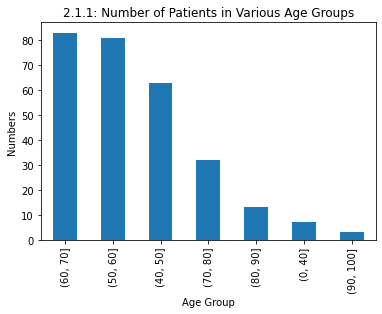

In [17]:
p=age_group.value_counts()
p.plot(kind="bar")
plt.title("2.1.1: Number of Patients in Various Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Numbers")

#### 2.1.2 Exploration on 'serum_sodium' feature

Text(0, 0.5, 'Serum Sodium Content(mEq/L)')

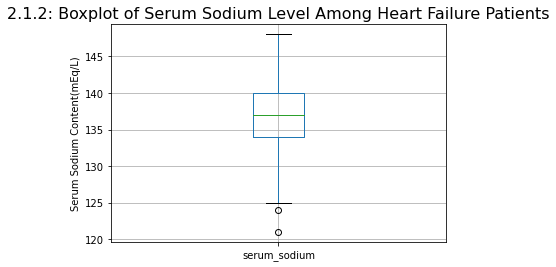

In [18]:
heartFailure['serum_sodium'].plot(kind="box", grid ="True")
plt.title("2.1.2: Boxplot of Serum Sodium Level Among Heart Failure Patients", fontsize=16)
plt.ylabel("Serum Sodium Content(mEq/L)")

#### 2.1.3 Exploration on 'platelets' feature

Text(0, 0.5, 'Numbers')

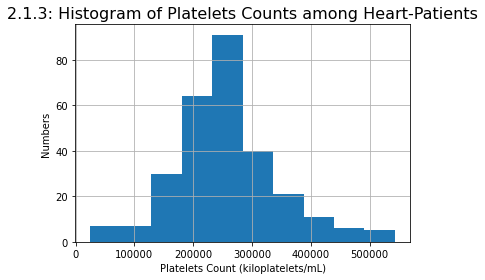

In [19]:
heartFailure['platelets'].plot(kind="hist", grid ="True")
plt.title("2.1.3: Histogram of Platelets Counts among Heart-Patients", fontsize=16)
plt.xlabel("Platelets Count (kiloplatelets/mL)")
plt.ylabel("Numbers")

#### 2.1.4 Exploration on 'time' Column

Text(0, 0.5, 'Numbers (days)')

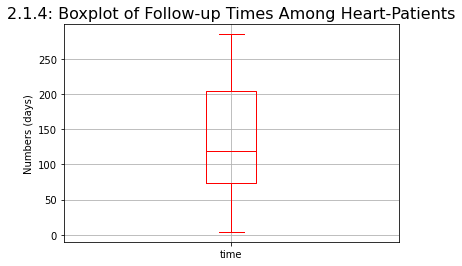

In [20]:
heartFailure['time'].plot(kind="box", grid ="True", color="r")
plt.title("2.1.4: Boxplot of Follow-up Times Among Heart-Patients", fontsize=16)
plt.ylabel("Numbers (days)")

#### 2.1.5 Exploration on 'ejection_fraction' Column

Text(0, 0.5, 'Numbers of Patients')

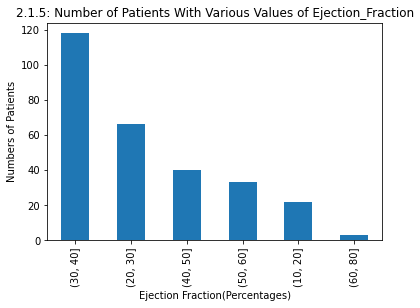

In [21]:
ejection = pd.cut(heartFailure['ejection_fraction'], bins=[10, 20, 30, 40,50, 60, 80])
ejection.value_counts().plot(kind="bar")
plt.title("2.1.5: Number of Patients With Various Values of Ejection_Fraction")
plt.xlabel("Ejection Fraction(Percentages)")
plt.ylabel("Numbers of Patients")

#### 2.1.6 Exploration of Sex and All Boolean Columns  (anaemia, diabetes, high_blood_pressure, smoking )

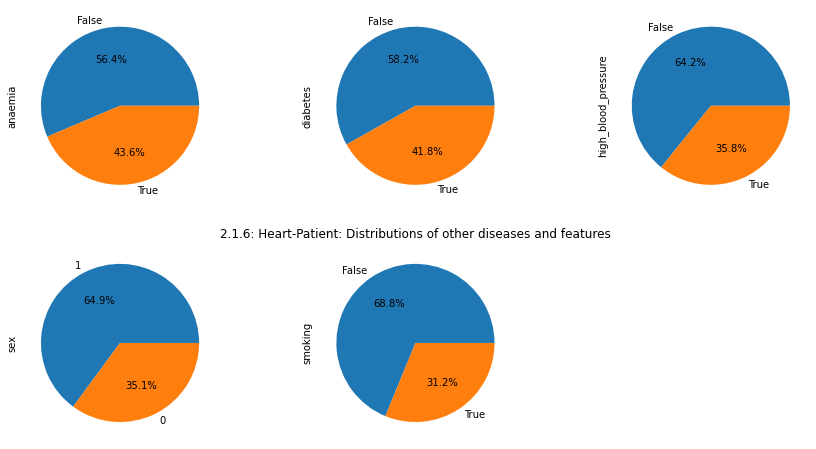

In [22]:
plt.figure(figsize=(15,8))
i = 1
for col in heartFailure.columns:
    if (heartFailure[col].dtypes != np.float64 and heartFailure[col].dtypes != np.int64 and col !='DEATH_EVENT'):
            plt.subplot(2,3,i)
            heartFailure[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
            i = i+1
plt.title('2.1.6: Heart-Patient: Distributions of other diseases and features')
plt.show()

#### 2.1.7 Exploration on 'serum_creatinine' feature

Text(0.5, 0, 'Level of Serum Creatinine in Blood (mg/dL)')

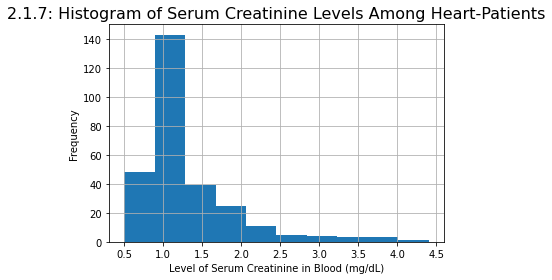

In [23]:
heartFailure['serum_creatinine'].plot(kind="hist", grid ="True")
plt.title("2.1.7: Histogram of Serum Creatinine Levels Among Heart-Patients", fontsize=16)
plt.xlabel("Level of Serum Creatinine in Blood (mg/dL)")

#### 2.1.8 Exploration on 'DEATH_EVENT' Column

Text(0.5, 1.0, '2.1.8:Death Event Numbers Among Heart-Failure Patients')

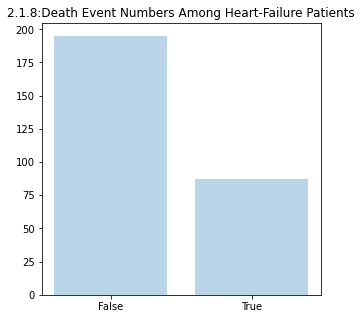

In [24]:
plt.figure(figsize=(5,5))
plt.bar(heartFailure['DEATH_EVENT'].value_counts().index.astype(str), 
heartFailure['DEATH_EVENT'].value_counts().values, alpha=0.3)
plt.title('2.1.8:Death Event Numbers Among Heart-Failure Patients')

### 2.2 Exploration of Relationships Between Pair of Attributes

#### Co-Relation Among ALL Columns in Heart-Failure Data:
Below are scatter plots for all numerical attributes for this dataset, from the plots below there are no strong indication of relationships between each pair of the plotting attributes. 

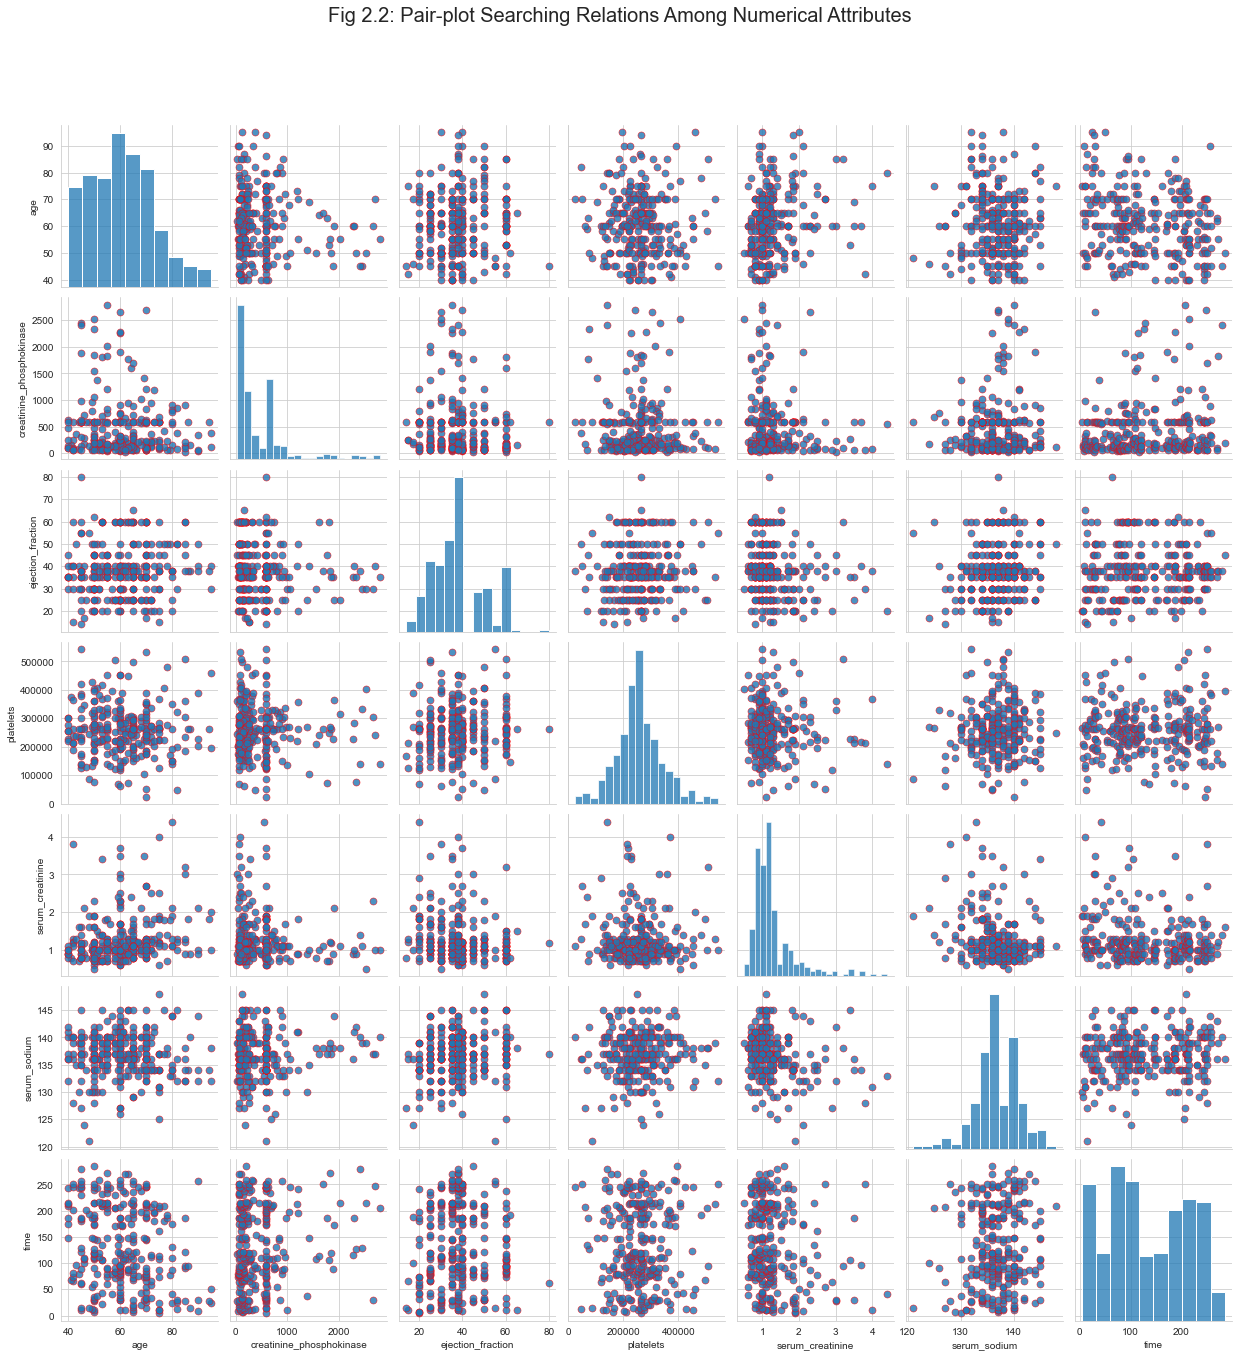

In [120]:

sns.set_style("whitegrid")
heartFailureWithoutBoolData = heartFailure.select_dtypes(exclude=['bool', 'category'])
g=sns.pairplot(heartFailureWithoutBoolData,
              plot_kws={'alpha':.8,'s':50,'edgecolor':'r'}, height=2.5)
g.fig.suptitle("Fig 2.2: Pair-plot Searching Relations Among Numerical Attributes", y=1.08, fontsize =20)
plt.show()

#### Correlations amongst features using heatmap
From the heatmap below, we can see some attribute pairs that have relatively strong correlations, they are age/DEATH_EVENT, age/time, time/DEATH_EVENT, serum_creatinine/DEATH_EVENT, smoking/sex, ejection_fraction/DEATH_EVENT, serum_sodium/serum_creatinine and age/serum_creatinine. We will analyse these attributes and try to understand more about the relationship later. 

Text(0.5, 1.08, 'Fig 2.2.0:  Heat Plot of All Attributes Showing Corelations')

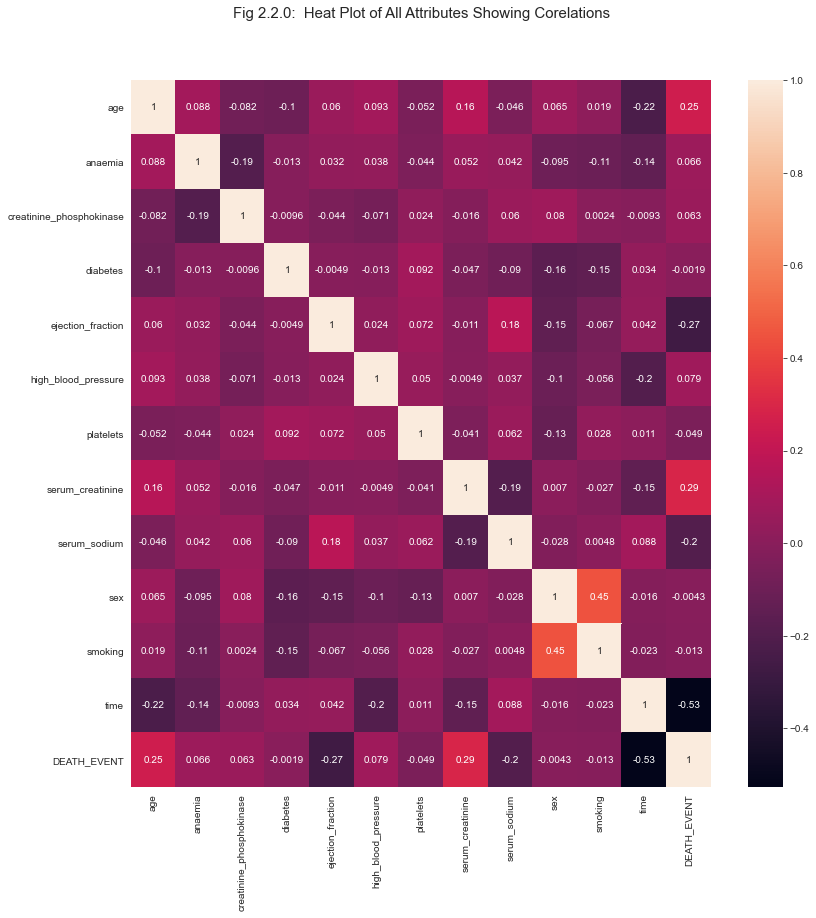

In [117]:
cor = heartFailureOriginal.corr()
plt.subplots(figsize=(13,13))
sns.heatmap(cor, annot=True)
plt.title("Fig 2.2.0:  Heat Plot of All Attributes Showing Corelations", fontsize =15,y=1.08)

In [27]:
patientDead=heartFailure[heartFailure['DEATH_EVENT']==1]
patientAlive=heartFailure[heartFailure['DEATH_EVENT']==0]

#### 2.2.1 Relationship of 'age' and 'DEATH_EVENT' columns

In [28]:
heartFailure.groupby('DEATH_EVENT')[['age']].describe()

age                                                    
             count       mean        std   min   25%   50%   75%   max
DEATH_EVENT                                                           
False        195.0  58.864959  10.555504  40.0  50.0  60.0  65.0  90.0
True          87.0  65.363989  13.300310  42.0  56.0  65.0  75.0  95.0

Text(0, 0.5, 'Numbers')

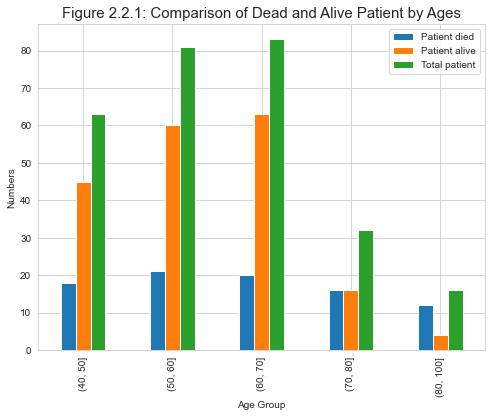

In [119]:
age_group_alive = pd.cut(patientAlive['age'], bins=[40, 50, 60, 70, 80, 100])
age_group_dead = pd.cut(patientDead['age'], bins=[40, 50, 60, 70, 80, 100])
counts_alive= age_group_alive.value_counts()
counts_dead = age_group_dead.value_counts()
counts_total = counts_alive+counts_dead
percent = counts_dead / counts_total
fmt = '{:.1%}'.format
age_patient = pd.DataFrame({'Patient died': counts_dead, 'Patient alive': counts_alive,
              'Total patient':counts_total, 'Death Percent in Same Age Group': percent.map(fmt)})
age_patient.plot(kind="bar", figsize=(8,6))
plt.title("Figure 2.2.1: Comparison of Dead and Alive Patient by Ages", fontsize=15)
plt.xlabel("Age Group")
plt.ylabel("Numbers")

#### 2.2.2  Relationship of 'anaemia' and 'DEATH_EVENT' feature

<AxesSubplot:title={'center':'2.2.2.1: Death and Survival Percentages With Respect To Presence or Absence of Anaemia Disease'}, ylabel='DEATH_EVENT'>

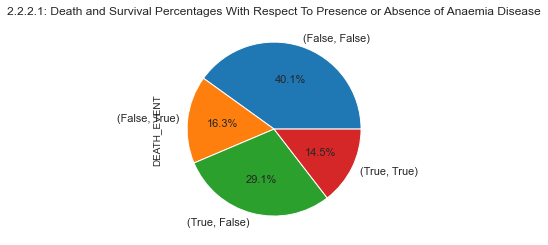

In [30]:
# 14.5% patients had anaemia who died
# 16.3% patients had anaemia who survived
# 40% patients had no anaemia who survived
# 29% patients had no anaemia who died
heartFailure['DEATH_EVENT'].groupby(heartFailure['anaemia']).value_counts()
anaemia=heartFailure['DEATH_EVENT'].groupby(heartFailure['anaemia']).value_counts()

anaemia.plot(kind='pie',autopct='%1.1f%%', fontsize=11, 
             title="2.2.2.1: Death and Survival Percentages With Respect To Presence or Absence of Anaemia Disease")

<AxesSubplot:title={'center':'2.2.2.2: Anaemia-Positive Percentages Among Alive Heart-Failue Patients'}, ylabel='anaemia'>

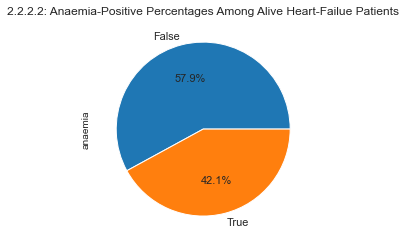

In [31]:
# Among dead heart-failure patients, anaemia positive was 47%
patientAlive['anaemia'].value_counts().plot(kind='pie',autopct='%1.1f%%', fontsize=11, title="2.2.2.2: Anaemia-Positive Percentages Among Alive Heart-Failue Patients")

<AxesSubplot:title={'center':'2.2.2.3: Anaemia-Positive Percentages Among The Deads.'}, ylabel='anaemia'>

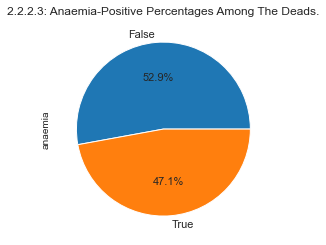

In [32]:
patientDead['anaemia'].value_counts().plot(kind='pie',autopct='%1.1f%%', fontsize=11, title="2.2.2.3: Anaemia-Positive Percentages Among The Deads.")

#### 2.2.3  Relationship between 'time' and DEATH_EVENT feature

In [33]:
time_span_alive = pd.cut(patientAlive['time'], bins=[0, 50, 100, 150, 200, 300])
time_span_dead = pd.cut(patientDead['time'], bins=[0, 50, 100, 150, 200, 300])

In [34]:
counts_alive= time_span_alive.value_counts()
counts_dead = time_span_dead.value_counts()
counts_total = counts_alive+counts_dead
percent = counts_dead / counts_total
fmt = '{:.1%}'.format
time_patient = pd.DataFrame({'Patient died': counts_dead, 'Patient alive': counts_alive,
              'Total patient':counts_total, 'Death % in Same follow-up Time Group': percent.map(fmt)})
time_patient

,Patient died,Patient alive,Total patient,Death % in Same follow-up Time Group
"(0, 50]",45,6,51,88.2%
"(50, 100]",19,47,66,28.8%
"(100, 150]",9,43,52,17.3%
"(150, 200]",10,28,38,26.3%
"(200, 300]",4,71,75,5.3%


#### 2.2.4 Analysis on relationship between 'serum_creatinine' and DEATH_EVENT columns

Text(0, 0.5, 'Level of Serium Creatinine')

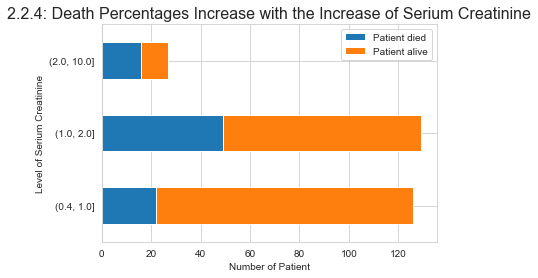

In [35]:
serum_alive = pd.cut(patientAlive['serum_creatinine'], bins=[0.4, 1, 2, 10])
serum_dead = pd.cut(patientDead['serum_creatinine'], bins=[0.4, 1, 2, 10])
counts_alive= serum_alive.value_counts()
counts_dead = serum_dead.value_counts()
counts_total = counts_alive+counts_dead
percent = counts_dead / counts_total
fmt = '{:.1%}'.format
serium_patient = pd.DataFrame({'Patient died': counts_dead, 'Patient alive': counts_alive})
serium_patient.plot(kind="barh",stacked=True)
plt.title("2.2.4: Death Percentages Increase with the Increase of Serium Creatinine", fontsize=16)
plt.xlabel("Number of Patient")
plt.ylabel("Level of Serium Creatinine")

#### 2.2.5 Analysis on relatioship among 'smoking' and 'sex' features

<AxesSubplot:title={'center':'Are the Maximum Smokers Among Heart Patient Male?'}, ylabel='smoking'>

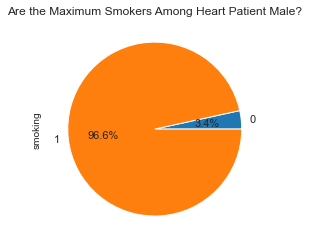

In [36]:
# Among smokers who are heart patient, only 3.4% are women
heartFailure['smoking'].groupby(heartFailure['sex']).value_counts()
patient_smoking=heartFailure['smoking'].groupby(heartFailureOriginal['sex']).sum()
patient_smoking.plot(kind='pie',autopct='%1.1f%%', fontsize=11, 
                     title="Are the Maximum Smokers Among Heart Patient Male?" )


<AxesSubplot:title={'center':'Smokers and Non-smokers Percentages With Respect To Sex Among Heart Patients'}, ylabel='smoking'>

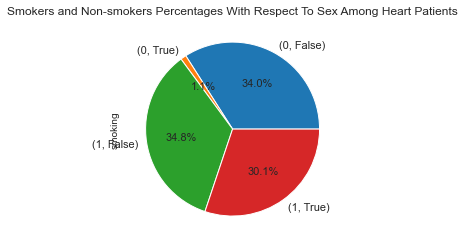

In [37]:
# 1.1% heart-patients are women who do smoking.
# 34.8% heart-patient are men who do smoking
# 34% heart-patients are women who do not smoke.
# 30.1% heart-patient are men who do not do smoking
patient_smoking=heartFailure['smoking'].groupby(heartFailure['sex']).value_counts()
patient_smoking.plot(kind='pie',autopct='%1.1f%%', fontsize=11, title="Smokers and Non-smokers Percentages With Respect To Sex Among Heart Patients" )


#### 2.2.6 Relationship between  'diabetes' and 'DEATH_EVENT' COLUMN

<AxesSubplot:title={'center':'fig2.2.6: Do Maximum Diabetes Patient Die in case of Heart Failure?'}, ylabel='DEATH_EVENT'>

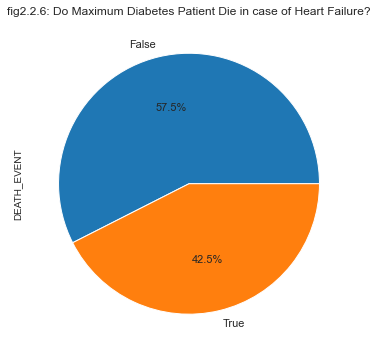

In [122]:
patient_dbts=heartFailure['diabetes'].groupby(heartFailure['DEATH_EVENT']).value_counts()
patient_dbts=heartFailure['DEATH_EVENT'].groupby(heartFailure['diabetes']==1).sum()
patient_dbts.plot(kind='pie',autopct='%1.1f%%', fontsize=11,title="fig 2.2.6: Do Maximum Diabetes Patient Die in case of Heart Failure?" )

<AxesSubplot:title={'center':'fig 2.2.6a: Diabetes-Positive Percentages Among Alive Heart-Failue Patients'}, ylabel='diabetes'>

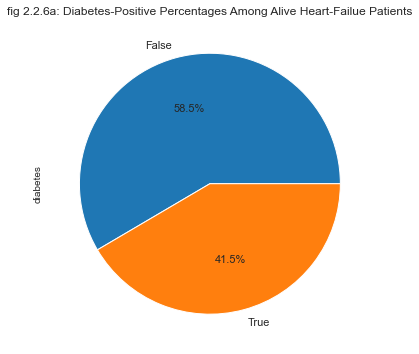

In [124]:
patientAlive['diabetes'].value_counts().plot(kind='pie',autopct='%1.1f%%', fontsize=11, title="fig 2.2.6a: Diabetes-Positive Percentages Among Alive Heart-Failue Patients")

#### 2.2.7 Relationship between 'ejection_fraction' and 'DEATH_EVENT' feature

Text(0, 0.5, 'Number of Patient')

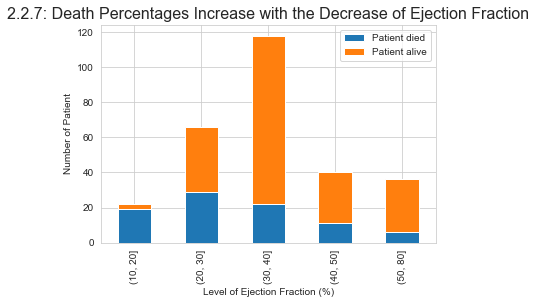

In [40]:
ejection_alive = pd.cut(patientAlive['ejection_fraction'], bins=[10, 20, 30, 40,50,80])
ejection_dead = pd.cut(patientDead['ejection_fraction'], bins=[10, 20, 30, 40,50,80])
counts_alive= ejection_alive.value_counts()
counts_dead = ejection_dead.value_counts()
counts_total = counts_alive+counts_dead
percent = counts_dead / counts_total
fmt = '{:.1%}'.format
serium_patient = pd.DataFrame({'Patient died': counts_dead, 'Patient alive': counts_alive})
serium_patient.plot(kind="bar",stacked=True)
plt.title("2.2.7: Death Percentages Increase with the Decrease of Ejection Fraction", fontsize=16)
plt.xlabel("Level of Ejection Fraction (%)")
plt.ylabel("Number of Patient")

Text(0.5, 1.0, 'Boxplot of Ejection Fraction by Death Events')

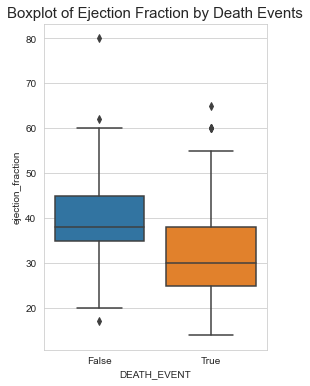

In [107]:
plt.rcParams["figure.figsize"]=4,6
sns.boxplot(x='DEATH_EVENT',y='ejection_fraction',data=heartFailure)
plt.title("Boxplot of Ejection Fraction by Death Events", fontsize =15)

#### 2.2.8 Relationship between 'serum_sodium' and 'DEATH_EVENT' feature

Text(0, 0.5, 'Number of Patient')

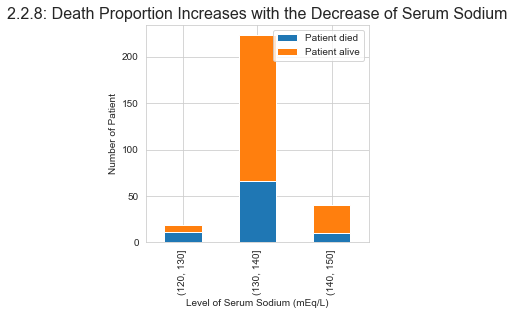

In [91]:
serum_alive = pd.cut(patientAlive['serum_sodium'], bins=[120, 130, 140, 150])
serum_dead = pd.cut(patientDead['serum_sodium'], bins=[120, 130, 140, 150])
counts_alive= serum_alive.value_counts()
counts_dead = serum_dead.value_counts()
counts_total = counts_alive+counts_dead
percent = counts_dead / counts_total
fmt = '{:.1%}'.format
serium_patient = pd.DataFrame({'Patient died': counts_dead, 'Patient alive': counts_alive})
serium_patient.plot(kind="bar",stacked=True)
plt.title("2.2.8: Death Proportion Increases with the Decrease of Serum Sodium", fontsize=16)
plt.xlabel("Level of Serum Sodium (mEq/L)")
plt.ylabel("Number of Patient")

#### 2.2.9 Relationship between 'age' and 'serum_creatinine' features

Text(0.5, 1.0, 'Box Plot of Serum Creatinine Level in Different Age Groups')

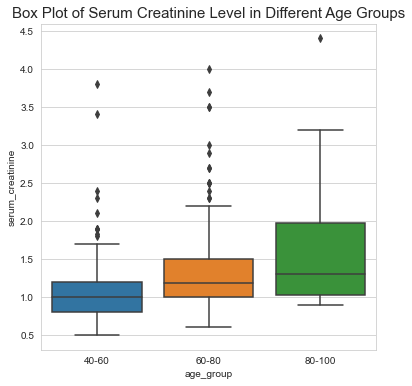

In [108]:
plt.rcParams["figure.figsize"]=6,6
heartFailure_age = heartFailure.copy()
bins=[40, 60, 80, 100]
labels= ['40-60','60-80','80-100']
heartFailure_age['age_group'] = pd.cut(heartFailure_age['age'], bins=bins, labels=labels, right=False)
sns.boxplot(x='age_group',y='serum_creatinine',data=heartFailure_age)
plt.title("Box Plot of Serum Creatinine Level in Different Age Groups", fontsize =15)

#### 2.2.10 Clear graph about relationship between 'age' and 'time' features

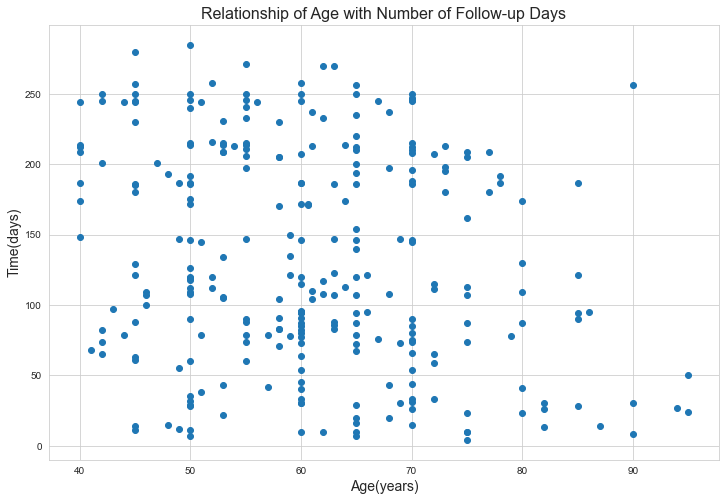

In [44]:
plt.rcParams["figure.figsize"]=12,8
plt.scatter(heartFailure['age'], heartFailure['time'])
plt.title('Relationship of Age with Number of Follow-up Days', fontsize=16)
plt.ylabel('Time(days)', fontsize=14)
plt.xlabel('Age(years)', fontsize=14)
plt.grid(True)
plt.show()

<AxesSubplot:title={'center':'Follow-up Days Derease With The Increase of Age'}, xlabel='age_group', ylabel='time'>

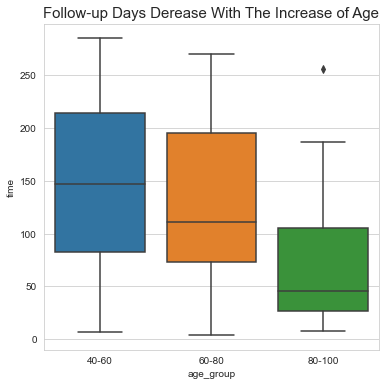

In [110]:
plt.rcParams["figure.figsize"] = (6,6)
plt.title("Follow-up Days Derease With The Increase of Age", fontsize=15)
sns.boxplot(x='age_group',y='time',data=heartFailure_age)

# 3. Data Modelling

## 3.1 Decision Tree Implementation
We selected the decision tree model because decision tree model can be used for a classification model training. It is easy to to understand and interpret the model. From the previous data exploration, there are categorical datatype and numerical datatype, decision tree model is good with both of these datatypes therefore it is a good selection. 

First we split the data into 80%/20% randomly, where the 80% data will be used for training and 20% will be used for testing.

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
heartFailureTarget = heartFailure['DEATH_EVENT']
heartFailureData = heartFailure.drop(columns='DEATH_EVENT')
X_train, X_test, y_train, y_test=train_test_split(heartFailureData, heartFailureTarget, test_size=.2,random_state=0)

In [48]:
X_train.shape

(225, 12)

In [49]:
y_train.shape

(225,)

In [50]:
clf_gini=DecisionTreeClassifier(criterion='gini')
fit = clf_gini.fit(X_train, y_train)
y_pre = fit.predict(X_test)

Text(0.5, 1.0, 'confusion matrix')

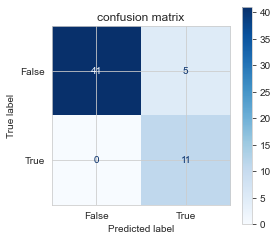

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (4,4)
pred_result = plot_confusion_matrix(clf_gini, X_test, y_test, cmap=plt.cm.Blues)
pred_result.ax_.set_title('confusion matrix')

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

       False       1.00      0.89      0.94        46
        True       0.69      1.00      0.81        11

    accuracy                           0.91        57
   macro avg       0.84      0.95      0.88        57
weighted avg       0.94      0.91      0.92        57



As we can see the base model has relatively good f1-score and accuracy. Next we will do a feature selection for the model. From the data exploration we can see some attributes have higher correlation with 'DEATH_EVENT' then the others, it is important to use the attributes that have strong correlations as this will improve our model and reduce overfitting. 

From the classification report we can see after feature selection we have improve the f1-score and accuracy. 
Then we will work on hyperparameter tuning and see if any particular parameter will improve our model performance. 

              precision    recall  f1-score   support

       False       1.00      0.83      0.90        46
        True       0.58      1.00      0.73        11

    accuracy                           0.86        57
   macro avg       0.79      0.91      0.82        57
weighted avg       0.92      0.86      0.87        57



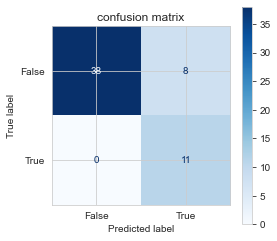

In [53]:
clf = DecisionTreeClassifier(criterion= 'entropy')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm= confusion_matrix(y_test, y_pre)

pred_result = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
pred_result.ax_.set_title('confusion matrix')

print(classification_report(y_test,y_pre))

In [54]:
from sklearn.metrics import accuracy_score
test_max_depth = range(2,10)

for depth in test_max_depth:
    clf_test = DecisionTreeClassifier(criterion= 'gini', max_depth = depth)
    
    fit = clf_test.fit(X_train, y_train)
    y_pre = fit.predict(X_test)
    score = accuracy_score(y_test, y_pre)
    
    print(("The number of depths: {:.0f}, accuracy score: {:.2f}").format(depth, score))

The number of depths: 2, accuracy score: 0.88
The number of depths: 3, accuracy score: 0.91
The number of depths: 4, accuracy score: 0.91
The number of depths: 5, accuracy score: 0.93
The number of depths: 6, accuracy score: 0.89
The number of depths: 7, accuracy score: 0.86
The number of depths: 8, accuracy score: 0.93
The number of depths: 9, accuracy score: 0.88


In [55]:
test_min_samples_split = range(2,5)

for splits in test_min_samples_split:
    clf_test = DecisionTreeClassifier(criterion= 'gini',max_depth = 5, min_samples_split = splits)
    
    fit = clf_test.fit(X_train, y_train)
    y_pre = fit.predict(X_test)
    score = accuracy_score(y_test, y_pre)
    print(("The number of splits: {:.0f}, accuracy score: {:.2f}").format(splits, score))

The number of splits: 2, accuracy score: 0.95
The number of splits: 3, accuracy score: 0.93
The number of splits: 4, accuracy score: 0.95


In [56]:
test_min_samples_leaf = range(1,6)

for leaf in test_min_samples_leaf:
    clf_test = DecisionTreeClassifier(criterion= 'gini', max_depth = 5, min_samples_split =2, min_samples_leaf =leaf)
    
    fit = clf_test.fit(X_train, y_train)
    y_pre = fit.predict(X_test)
    score = accuracy_score(y_test, y_pre)
    
    print(("The number of minimum samples leaf: {:.0f}, accuracy score: {:.2f}").format(leaf, score))

The number of minimum samples leaf: 1, accuracy score: 0.93
The number of minimum samples leaf: 2, accuracy score: 0.93
The number of minimum samples leaf: 3, accuracy score: 0.91
The number of minimum samples leaf: 4, accuracy score: 0.89
The number of minimum samples leaf: 5, accuracy score: 0.91


From the hyperparameter tuning above we now know that the model performs the best with criterion= 'gini', max_depth =5, min_samples_split =2 and min_samples_leaf =1, therefore below is our final decision tree model.

              precision    recall  f1-score   support

       False       0.98      0.96      0.97        46
        True       0.83      0.91      0.87        11

    accuracy                           0.95        57
   macro avg       0.91      0.93      0.92        57
weighted avg       0.95      0.95      0.95        57



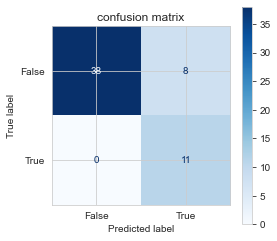

In [57]:
clf_final = DecisionTreeClassifier(criterion= 'gini', max_depth =5, min_samples_split =2, min_samples_leaf =1)
fit = clf_final.fit(X_train, y_train)
y_pre = fit.predict(X_test)
pred_result = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
pred_result.ax_.set_title('confusion matrix')
print(classification_report(y_test,y_pre))

In [58]:
from sklearn import tree

with open ("heart_failure_clinical_records_dataset2.csv","w") as z:
    z=tree.export_graphviz(clf_final, out_file="tree.dot",feature_names = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
        class_names = 'DEATH_EVENT', filled =True, rounded =True,special_characters =True)

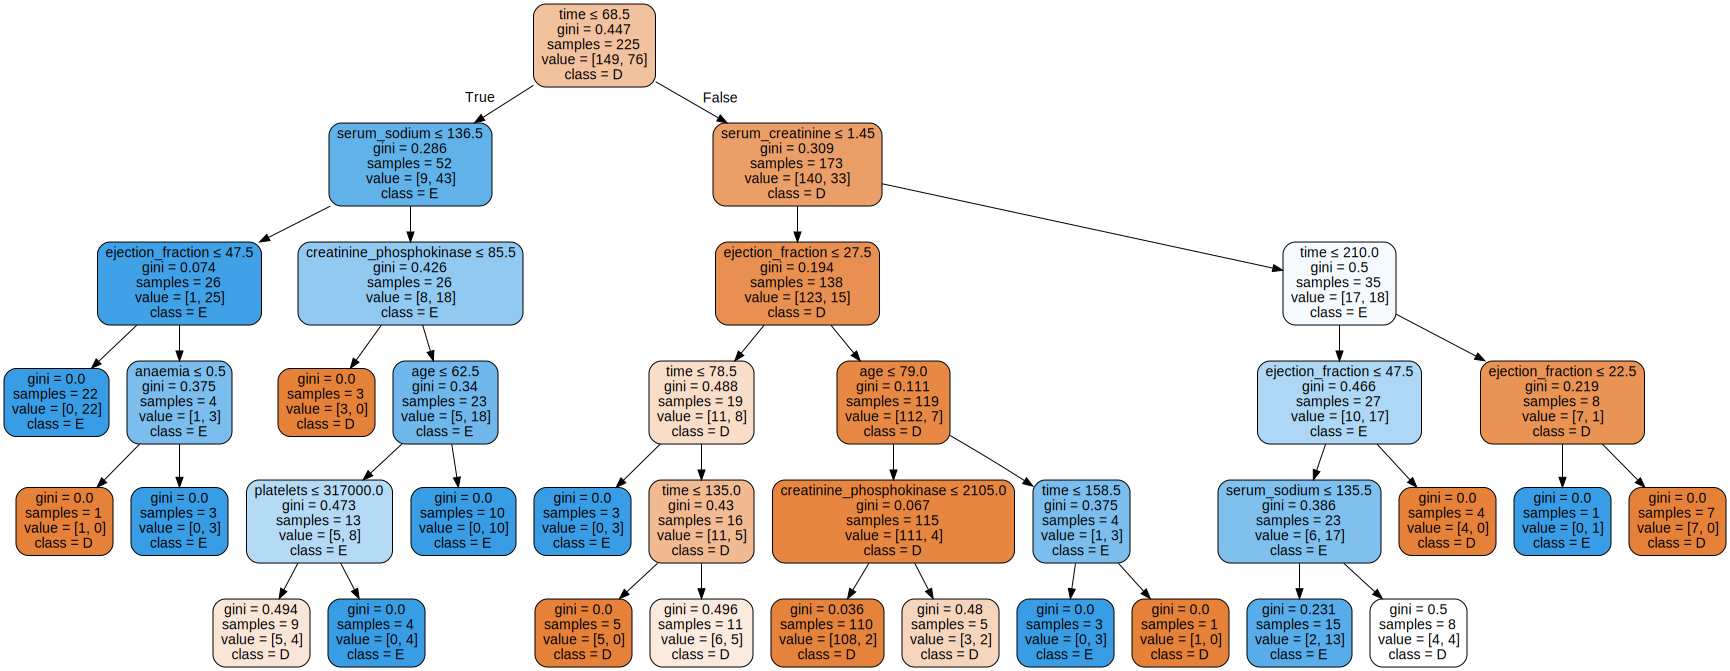

In [59]:
import graphviz as graphviz

with open("tree.dot") as f:
    dot_graph = f.read()

graph = graphviz.Source(dot_graph)
graph.format='png'
graph.render('DecisionTree')
graph


# 3.2 Implementation of K Nearest Neighbourhood Classification Technique


## 3.2.1 Feature Selection With Hill-Climbing Technique

In [60]:
heartFailure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,False,582,False,20,True,265000.0,1.9,130,1,False,4,True
2,65.0,False,146,False,20,False,162000.0,1.3,129,1,True,7,True
3,50.0,True,111,False,20,False,210000.0,1.9,137,1,False,7,True
5,90.0,True,47,False,40,True,204000.0,2.1,132,1,True,8,True
6,75.0,True,246,False,15,False,127000.0,1.2,137,1,False,10,True


In [61]:
from sklearn.neighbors import KNeighborsClassifier
clf_distance = KNeighborsClassifier(n_neighbors=5, metric='minkowski', weights='distance', p=1)

In [62]:
from sklearn.utils import shuffle

col_num = 12
col_Ind_Random = shuffle(range(0,col_num), random_state=6)

In [63]:
def hillClimbingKnn(col_Ind_Random):
    new_Ind = []
    cur_MaxScore = 0
    combo_best_score = 0
    print(col_Ind_Random)
    for cur_f in range(0, col_num):
        new_Ind.append(col_Ind_Random[cur_f])
        newData = heartFailure.iloc[:,new_Ind]
        X_train, X_test, y_train, y_test=train_test_split(newData, heartFailureTarget,  test_size=.2,random_state=10)
        fit = clf_distance.fit(X_train, y_train)
        cur_Score = clf_distance.score(X_test, y_test)
        if cur_Score <= cur_MaxScore:
            new_Ind.remove(col_Ind_Random[cur_f])
        else:
            cur_MaxScore = cur_Score
            print("Score with " + str(len(new_Ind)) + "(feature: " + 
              str(col_Ind_Random[cur_f])+ ") selected features: " + str(round(cur_Score,2)))
    return new_Ind

In [64]:
new_Ind = hillClimbingKnn(col_Ind_Random)

[8, 11, 1, 6, 0, 7, 5, 2, 4, 3, 9, 10]
Score with 1(feature: 8) selected features: 0.68
Score with 2(feature: 11) selected features: 0.84
Score with 3(feature: 0) selected features: 0.89
Score with 4(feature: 7) selected features: 0.91
Score with 5(feature: 4) selected features: 0.93


In [65]:
# So selected features are:
colname = heartFailure.columns[new_Ind]
print (colname)

Index(['serum_sodium', 'time', 'age', 'serum_creatinine', 'ejection_fraction'], dtype='object')


## 3.2.2: Detailing of KNN Model Build-up

In [66]:
heartFailure_KNN =heartFailure[['serum_sodium', 'time', 'age', 'serum_creatinine', 'ejection_fraction', 'DEATH_EVENT']]

In [67]:
X=heartFailure_KNN.iloc[:,:-1].values
y=heartFailure_KNN.iloc[:,-1].values
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2,random_state=0)

In [68]:
clf_distance.fit(X_train, y_train)
predicted_distance = clf_distance.predict(X_test)

In [69]:
predicted_distance

array([False, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False,  True, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
        True, False, False, False,  True,  True, False, False, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False])

In [70]:
y_test

array([False, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False])

In [71]:
predicted_distance.shape, y_train.shape

((57,), (225,))

In [72]:
## showing confusion matrix
cm_distance = confusion_matrix(y_test,predicted_distance)
print(cm_distance)

[[41  5]
 [ 0 11]]


              precision    recall  f1-score   support

       False       1.00      0.89      0.94        46
        True       0.69      1.00      0.81        11

    accuracy                           0.91        57
   macro avg       0.84      0.95      0.88        57
weighted avg       0.94      0.91      0.92        57



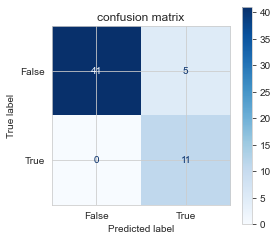

In [73]:
## showing score and details of classification report with visualisation
pred_result = plot_confusion_matrix(clf_distance, X_test, y_test, cmap=plt.cm.Blues)
pred_result.ax_.set_title('confusion matrix')
print(classification_report(y_test,predicted_distance))

## 3.2.3: KNN Hyperparameter Tuning and Visualization

In [74]:
p_value =range(1,4)
neighbour = range(1,8)
weight= ['distance','uniform']

In [75]:
for wts in weight:
    for i in p_value:
        for j in neighbour:
            clf_distance = KNeighborsClassifier(n_neighbors=j, metric='minkowski', weights=wts, p=i)
            clf_distance.fit(X_train, y_train)
            predicted_distance = clf_distance.predict(X_test)
            print("[Train/test split] score  with weight = {}, p = {:.0f}, n_neighbours = {:.0f} is : {:.2f}".format(wts,
                                                                                                                     i,j,clf_distance.score(X_test, y_test)))
        

[Train/test split] score  with weight = distance, p = 1, n_neighbours = 1 is : 0.84
[Train/test split] score  with weight = distance, p = 1, n_neighbours = 2 is : 0.84
[Train/test split] score  with weight = distance, p = 1, n_neighbours = 3 is : 0.86
[Train/test split] score  with weight = distance, p = 1, n_neighbours = 4 is : 0.88
[Train/test split] score  with weight = distance, p = 1, n_neighbours = 5 is : 0.91
[Train/test split] score  with weight = distance, p = 1, n_neighbours = 6 is : 0.89
[Train/test split] score  with weight = distance, p = 1, n_neighbours = 7 is : 0.93
[Train/test split] score  with weight = distance, p = 2, n_neighbours = 1 is : 0.84
[Train/test split] score  with weight = distance, p = 2, n_neighbours = 2 is : 0.84
[Train/test split] score  with weight = distance, p = 2, n_neighbours = 3 is : 0.89
[Train/test split] score  with weight = distance, p = 2, n_neighbours = 4 is : 0.89
[Train/test split] score  with weight = distance, p = 2, n_neighbours = 5 is

In [76]:
# So from all trial and errors, it is obvious that 
# n_neighbours=6, weight= "uniform", p=1 is the best parameters for this data-set

## 3.2.4: Final Selection of Parameters for KNN Model

[Train/test split] score following uniform weight: 0.95
              precision    recall  f1-score   support

       False       0.98      0.96      0.97        46
        True       0.83      0.91      0.87        11

    accuracy                           0.95        57
   macro avg       0.91      0.93      0.92        57
weighted avg       0.95      0.95      0.95        57



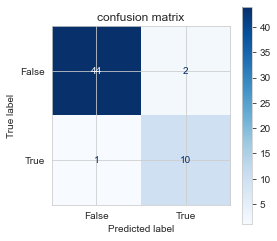

In [77]:
clf_uniform = KNeighborsClassifier(n_neighbors=6,metric='minkowski', weights='uniform', p=1)
clf_uniform.fit(X_train, y_train)
predicted_uniform = clf_uniform.predict(X_test)
print("[Train/test split] score following uniform weight: {:.2f}".format(clf_uniform.score(X_test, y_test)))
pred_result = plot_confusion_matrix(clf_uniform, X_test, y_test, cmap=plt.cm.Blues)
pred_result.ax_.set_title('confusion matrix')
print(classification_report(y_test,predicted_uniform))

# 3.3: K-Folds Cross-Validation

In [78]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

## 3.3.1:Validation of Decision Tree Model

In [79]:
for k, (train_index, test_index) in enumerate(kf.split(heartFailure)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_final.fit(X_train, y_train)
    print("[fold {0}] score: {1:.3f}".format(k, clf_final.score(X_test, y_test)))

[fold 0] score: 0.793
[fold 1] score: 0.759
[fold 2] score: 0.750
[fold 3] score: 0.750
[fold 4] score: 0.857
[fold 5] score: 0.821
[fold 6] score: 0.750
[fold 7] score: 0.893
[fold 8] score: 0.821
[fold 9] score: 1.000


## 3.3.2: Validation of K-Nearest Neighbour Model

In [80]:
for k, (train_index, test_index) in enumerate(kf.split(heartFailure)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_uniform.fit(X_train, y_train)
    print("[fold {0}] score: {1:.3f}".format(k, clf_distance.score(X_test, y_test)))

[fold 0] score: 0.897
[fold 1] score: 0.759
[fold 2] score: 1.000
[fold 3] score: 0.857
[fold 4] score: 0.786
[fold 5] score: 0.750
[fold 6] score: 0.893
[fold 7] score: 0.893
[fold 8] score: 0.893
[fold 9] score: 1.000
